<a href="https://colab.research.google.com/github/LorisDiotallevi/UniversityProjects/blob/main/Portfolio_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portfolio Optimization of Tech Stocks 📈
### Using Python and Markowitz Efficient Frontier

This project is about **portfolio optimization** using the **Markowitz Modern Portfolio Theory (MPT)**.  
I focus on **Tech Stocks** to analyze how diversification works within a single industry.

## Why Tech Stocks?  
Technology companies dominate financial markets and show strong growth trends.  
By selecting only Tech stocks, we **explore intra-sector diversification** rather than cross-industry diversification.

📊 **Objective:**  
- Download historical stock data from **Yahoo Finance**   
- Calculate portfolio returns, volatility, and the **Efficient Frontier**   
- Find the **optimal portfolio** that maximizes the **Sharpe Ratio**   
- Visualize and interpret the results using Python

---
🔗 **Libraries Used:** `numpy`, `pandas`, `matplotlib`, `seaborn`, `yfinance`, `scipy.optimize`


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize

# Set default style for plots
plt.style.use('ggplot')

In [ ]:
# List of Tech Stocks
tech_stocks = ['AAPL', 'MSFT', 'NVDA', 'AMZN', 'GOOGL',
               'META', 'TSLA', 'NFLX', 'ADBE', 'CRM']

# Download historical stock data
start_date = "2020-01-01"
end_date = "2025-02-01"

data = yf.download(tech_stocks, start=start_date, end=end_date)
data = data['Close']


# Display the first few rows
data.head()

[*********************100%***********************]  10 of 10 completed


Ticker,AAPL,ADBE,AMZN,CRM,GOOGL,META,MSFT,NFLX,NVDA,TSLA
Date,,,,,,,,,,
2020-01-02,72.716072,334.429993,94.900497,166.062485,68.186813,208.981705,153.630676,329.809998,5.972710,28.684000
2020-01-03,72.009125,331.809998,93.748497,165.247040,67.830109,207.875931,151.717728,325.899994,5.877110,29.534000
2020-01-06,72.582901,333.709991,95.143997,172.486588,69.638054,211.790970,152.109863,335.829987,5.901758,30.102667
2020-01-07,72.241554,333.390015,95.343002,175.022430,69.503548,212.249207,150.722977,330.750000,5.973208,31.270666
2020-01-08,73.403648,337.869995,94.598503,176.345047,69.998245,214.401001,153.123749,339.260010,5.984411,32.809334


In [ ]:
# Calculate log returns
returns = np.log(data / data.shift(1)).dropna()

# Compute annualized mean log returns
mean_returns = returns.mean() * 252  # Assuming 252 trading days per year

# Compute the annualized covariance matrix using log returns
cov_matrix = returns.cov() * 252

# Display results
print("Annualized Mean Log Returns:")
print(mean_returns)

print("\nAnnualized Covariance Matrix:")
print(cov_matrix)

Annualized Mean Log Returns:
Ticker
AAPL     0.232103
ADBE     0.052992
AMZN     0.181175
CRM      0.142393
GOOGL    0.216275
META     0.235474
MSFT     0.196128
NFLX     0.214254
NVDA     0.592185
TSLA     0.522265
dtype: float64

Annualized Covariance Matrix:
Ticker      AAPL      ADBE      AMZN       CRM     GOOGL      META      MSFT  \
Ticker                                                                         
AAPL    0.100083  0.075665  0.066970  0.067460  0.066243  0.079657  0.071937   
ADBE    0.075665  0.151837  0.084004  0.101871  0.078401  0.095764  0.085240   
AMZN    0.066970  0.084004  0.128038  0.079932  0.075300  0.097949  0.074173   
CRM     0.067460  0.101871  0.079932  0.158539  0.070643  0.091125  0.077486   
GOOGL   0.066243  0.078401  0.075300  0.070643  0.105266  0.093169  0.073336   
META    0.079657  0.095764  0.097949  0.091125  0.093169  0.204288  0.084360   
MSFT    0.071937  0.085240  0.074173  0.077486  0.073336  0.084360  0.093415   
NFLX    0.066230  

## 📊 Understanding Monte Carlo Simulations and Sharpe Ratio

### **Monte Carlo Simulations in Portfolio Optimization**
Monte Carlo simulations are widely used in finance to model **uncertain outcomes** by randomly generating a large number of scenarios.  
In this project, I **simulated 100,000 random portfolios**, each with a different asset allocation.  

### **How did we generate these portfolios?**
Each simulated portfolio was constructed as follows:
1. **Randomly assigning weights** to the selected stocks:  
   - Each weight was generated randomly and then normalized so that the sum of all weights equals **1**:  
     $$ w_1 + w_2 + ... + w_n = 1 $$
   - This ensures that each portfolio represents a **fully invested** strategy.
2. **Calculating portfolio metrics** for each simulation:  
   - **Expected Return**:
     $$ E[R_p] = \sum_{i=1}^{n} w_i R_i $$
   - **Volatility (Risk)**:
     $$ \sigma_p = \sqrt{ w^T \Sigma w } $$
   - **Sharpe Ratio**:
     $$ SR = \frac{E[R_p] - R_f}{\sigma_p} $$

Where:  
- $ w_i $ = weight of asset $ i $ in the portfolio.  
- $ R_i $ = expected return of asset $ i $.  
- $ \Sigma $ = covariance matrix of asset returns.  
- $ E[R_p] $ = expected return of the portfolio.  
- $ \sigma_p $ = portfolio standard deviation (volatility).  
- $ R_f $ = **Risk-Free Rate** (we used the **U.S. 3-Month Treasury Bill rate of 4.325%**).  

These calculations allow us to visualize **100,000 portfolios**, each with different risk-return characteristics.

---

### **What is the Sharpe Ratio? Why is it important?**
The **Sharpe Ratio** helps compare different portfolios based on **risk-adjusted returns**.  
A **higher Sharpe Ratio** indicates a **better return per unit of risk**, making it an essential tool for **optimal portfolio selection**.  

By considering the risk-free rate, the Sharpe Ratio allows us to compare different portfolios **on a level playing field**, helping investors make more informed decisions.

---

### **Visualizing the Efficient Frontier**
Now, we will plot the **Efficient Frontier**, highlighting three key portfolios:  
✅ **Minimum Volatility Portfolio** (for risk-averse investors)  
✅ **Maximum Return Portfolio** (for aggressive investors)  
✅ **Optimal Portfolio (Risk = 0.35)** (a balanced approach)  

This visualization helps understand how different portfolios perform under varying risk levels.

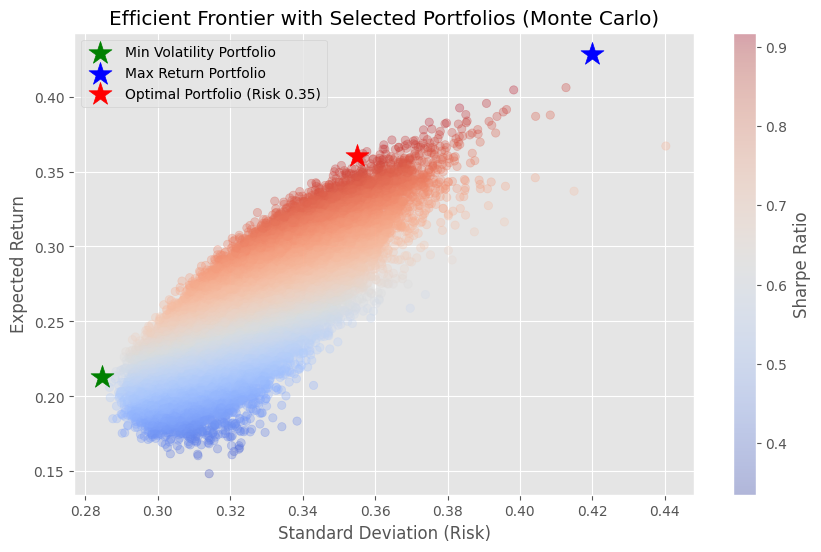

In [ ]:
# Risk-free rate (U.S. 3-Month Treasury at 4.325%)
risk_free_rate = 0.04325

# Number of portfolios to simulate
num_portfolios = 100000

# Empty arrays to store results
results = np.zeros((3, num_portfolios))
weights_record = []

for i in range(num_portfolios):
    weights = np.random.random(len(tech_stocks))
    weights /= np.sum(weights)  # Normalize to sum to 1

    # Portfolio return and volatility
    port_return = np.dot(weights, mean_returns)
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    # Sharpe Ratio
    sharpe_ratio = (port_return - risk_free_rate) / port_volatility

    # Store results
    results[0, i] = port_return
    results[1, i] = port_volatility
    results[2, i] = sharpe_ratio
    weights_record.append(weights)

# Convert results to pandas DataFrame
results_df = pd.DataFrame(results.T, columns=['Return', 'Volatility', 'Sharpe Ratio'])

# --- Find the three key portfolios from Monte Carlo simulation ---
# 1️⃣ Portfolio with Minimum Volatility
opt_min_vol = results_df.loc[results_df['Volatility'].idxmin()]

# 2️⃣ Portfolio with Maximum Return
opt_max_return = results_df.loc[results_df['Return'].idxmax()]

# 3️⃣ Portfolio with Volatility Closest to 0.35 and Highest Return
target_volatility = 0.35
tolerance = 0.005  # Allow a small range around 0.35
filtered_df = results_df[(results_df['Volatility'] >= target_volatility - tolerance) &
                         (results_df['Volatility'] <= target_volatility + tolerance)]
opt_fixed_risk = filtered_df.loc[filtered_df['Return'].idxmax()]

# --- Plot the Efficient Frontier and Selected Portfolios ---
plt.figure(figsize=(10,6))

# Scatter plot for Monte Carlo simulation with consistent color mapping
scatter = plt.scatter(results_df['Volatility'], results_df['Return'],
                       c=results_df['Sharpe Ratio'], cmap='coolwarm', alpha=0.3)
plt.colorbar(scatter, label='Sharpe Ratio')  # Ensures color mapping is consistent

# Highlight the three key portfolios
plt.scatter(opt_min_vol['Volatility'], opt_min_vol['Return'], color='green', marker='*', s=300, label='Min Volatility Portfolio')
plt.scatter(opt_max_return['Volatility'], opt_max_return['Return'], color='blue', marker='*', s=300, label='Max Return Portfolio')
plt.scatter(opt_fixed_risk['Volatility'], opt_fixed_risk['Return'], color='red', marker='*', s=300, label=f'Optimal Portfolio (Risk {target_volatility})')

# Labels and title
plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier with Selected Portfolios (Monte Carlo)')
plt.legend()
plt.show()


In [ ]:
# Create a DataFrame to compare the three selected portfolios
comparison_df = pd.DataFrame({
    'Portfolio': ['Min Volatility', 'Max Return', f'Optimal (Risk {target_volatility})'],
    'Expected Return': [opt_min_vol['Return'], opt_max_return['Return'], opt_fixed_risk['Return']],
    'Volatility': [opt_min_vol['Volatility'], opt_max_return['Volatility'], opt_fixed_risk['Volatility']],
    'Sharpe Ratio': [opt_min_vol['Sharpe Ratio'], opt_max_return['Sharpe Ratio'], opt_fixed_risk['Sharpe Ratio']]
})

# Display the table
print("📊 Portfolio Comparison:")
display(comparison_df)

# Extract portfolio weights
portfolios_weights = {
    'Stock': tech_stocks,
    'Min Volatility': weights_record[opt_min_vol.name],
    'Max Return': weights_record[opt_max_return.name],
    f'Optimal (Risk {target_volatility})': weights_record[opt_fixed_risk.name]
}

weights_df = pd.DataFrame(portfolios_weights)

# Display the table of portfolio weights
print("\n📌 Portfolio Weights:")
display(weights_df)

📊 Portfolio Comparison:


,Portfolio,Expected Return,Volatility,Sharpe Ratio
0,Min Volatility,0.213262,0.284621,0.597326
1,Max Return,0.428597,0.419875,0.917766
2,Optimal (Risk 0.35),0.360193,0.354981,0.892846



📌 Portfolio Weights:


,Stock,Min Volatility,Max Return,Optimal (Risk 0.35)
0,AAPL,0.248154,0.088061,0.151218
1,MSFT,0.019323,0.032065,0.003852
2,NVDA,0.046116,0.000362,0.005794
3,AMZN,0.014488,0.007848,0.076404
4,GOOGL,0.289931,0.040247,0.157893
5,META,0.060804,0.011392,0.092603
6,TSLA,0.288595,0.125428,0.089931
7,NFLX,0.021996,0.044308,0.001686
8,ADBE,0.005053,0.288510,0.276516
9,CRM,0.005539,0.361779,0.144102


# 📌 Conclusion

In this project, I explored **portfolio optimization** using **Monte Carlo simulations** and **Markowitz’s Modern Portfolio Theory (MPT)**, selecting three key portfolios:

1️⃣ **Min Volatility Portfolio** → Best for risk-averse investors seeking stability.  
2️⃣ **Max Return Portfolio** → Ideal for aggressive investors willing to take on higher risk for greater returns.  
3️⃣ **Optimal Portfolio (σ = 0.35)** → A balanced choice, achieving a good trade-off between risk and return.

### **Key Takeaways**
✅ The choice of the optimal portfolio **depends on the investor's risk tolerance**.  
✅ Since all stocks in this study are **from the Tech sector**, returns are generally higher, but so is the risk.  
✅ Graphically, all three portfolios **lie on the Efficient Frontier**, confirming they are optimal in terms of risk-adjusted returns.  

### **Considerations & Limitations**
This analysis **does not incorporate additional constraints**, which are often included in real-world portfolio optimization. For example, a more advanced model could include:

- **Budget constraints** (e.g., ensuring no single asset exceeds a certain weight).  
- **Sector allocation limits** (to maintain diversification).  
- **Transaction costs and liquidity constraints**.  
- **Factor-based investing** (e.g., considering macroeconomic indicators or fundamental metrics).  

### **Final Thoughts**
This project provides a **strong foundation for understanding portfolio optimization**, but **can be extended** by incorporating additional factors and constraints.  
Future improvements could explore **multi-asset portfolios**, risk-adjusted benchmarks, or **machine learning approaches** to asset allocation.  